# Importing necessary libraries & Input Images

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
im2 = cv.imread('f2.png', 0)
im = cv.imread('a.png', 0)

# 1. Dilation 2. Erosion 3. Opening 4. Closing

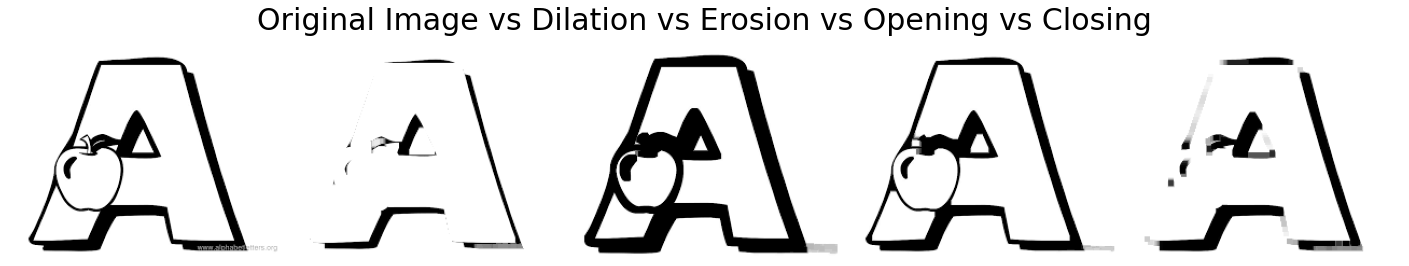

In [ ]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv.erode(im, kernel, iterations=1)
img_dilation = cv.dilate(im, kernel, iterations=1)
img_opening = cv.morphologyEx(im, cv.MORPH_OPEN, kernel)
img_closing = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel)

res = np.hstack([im, img_dilation, img_erosion, img_opening, img_closing])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Dilation vs Erosion vs Opening vs Closing', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 5. Boundary Detection



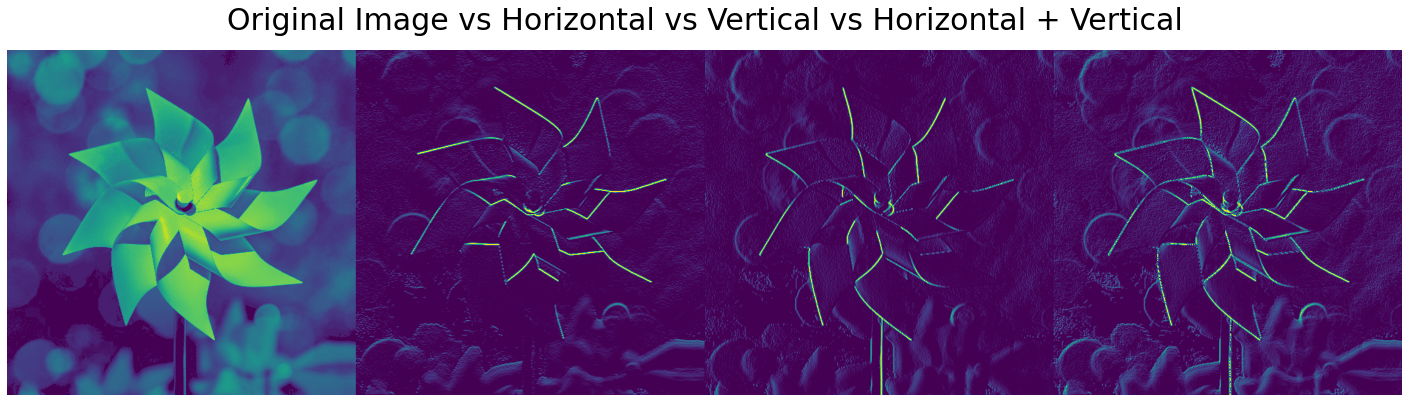

In [ ]:
Hkernal = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vkernal = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
robertH = cv.filter2D(src=im2, kernel=Hkernal, ddepth=-1)
robertV = cv.filter2D(src=im2, kernel=Vkernal, ddepth=-1)
robert = robertH + robertV

res = np.hstack([im2, robertH, robertV, robert])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Horizontal vs Vertical vs Horizontal + Vertical', fontsize=30, color='black', pad=20)
plt.imshow(res)
plt.axis('off')
plt.show(block=True)

# 6. Region Filling

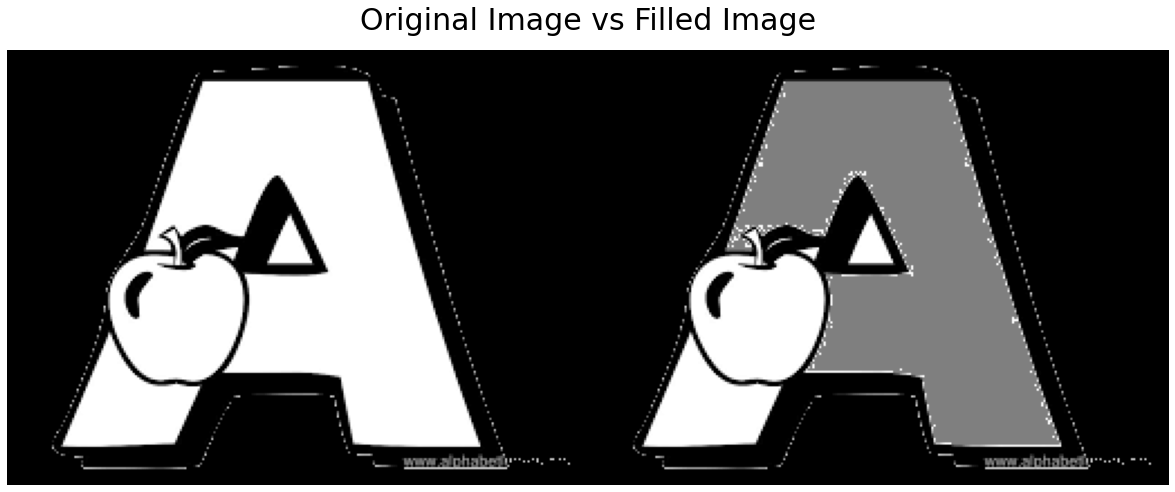

In [ ]:
from skimage.segmentation import flood_fill
mask = np.zeros([im.shape[0]+2, im.shape[1]+2, 1], np.uint8)
filled_image = flood_fill(im, (76, 76), 127)

res = np.hstack([im, filled_image])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Filled Image', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 7. Thinning 8. Thickening

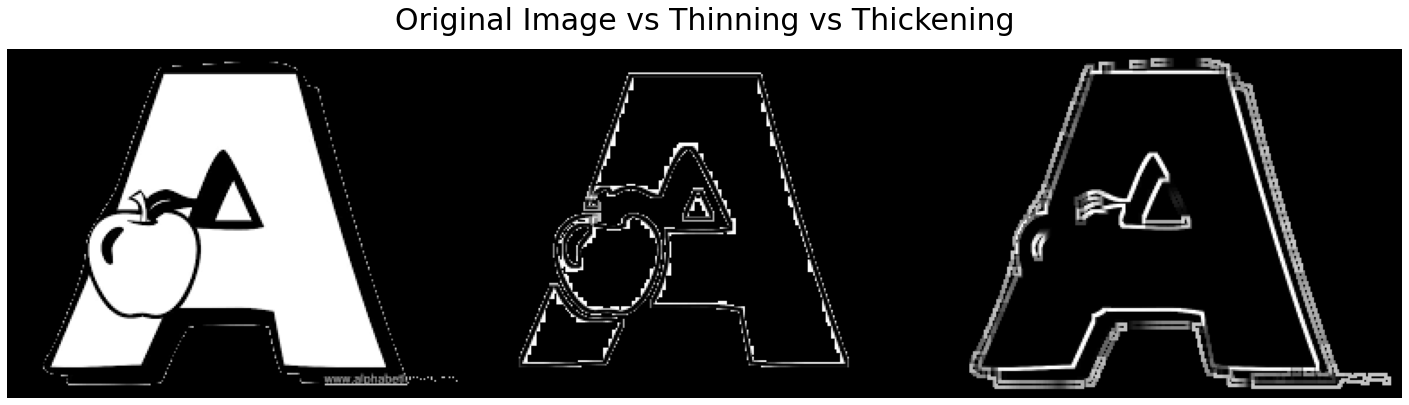

In [ ]:
th = np.zeros(im.shape,dtype='uint8')
img_erosion = cv.erode(im, kernel, iterations=1)
opening = cv.morphologyEx(im, cv.MORPH_OPEN, kernel)
subset_img = img_erosion-opening
thin = cv.bitwise_or(subset_img, th)

img_dilation = cv.dilate(im, kernel, iterations=1)
closing = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel)
subset_img2 = img_dilation-closing
thick = cv.bitwise_or(subset_img2, th)

res = np.hstack([im, thin, thick])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Thinning vs Thickening', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 9. Convex Hul 10. Skeleton

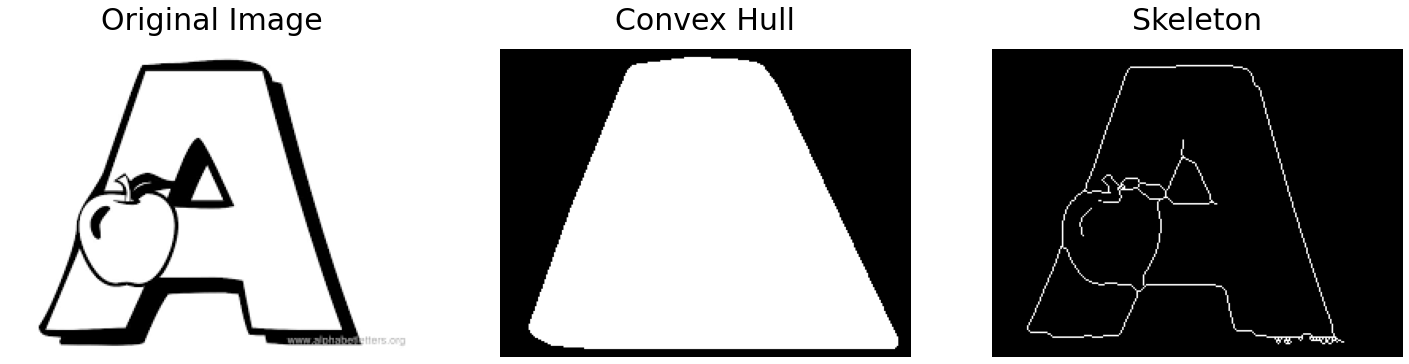

In [ ]:
from skimage.morphology import skeletonize, convex_hull_image
from skimage.util import invert
from skimage import filters

image = invert(im)
chull = convex_hull_image(image)

binary = image > filters.threshold_otsu(image)
skeleton = skeletonize(binary)

f=plt.figure(figsize=(25,8))
f.add_subplot(1,3,1)
plt.title('Original Image', fontsize=30, color='black', pad=20)
plt.imshow(im,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,2)
plt.title('Convex Hull', fontsize=30, color='black', pad=20)
plt.imshow(chull,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,3)
plt.title('Skeleton', fontsize=30, color='black', pad=20)
plt.imshow(skeleton,cmap='gray')
plt.axis('off')
plt.show(block=True)